<a href="https://colab.research.google.com/github/caroalvarezf/Trabajo-Especiliazacion/blob/master/01_PREPARACION_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/caroalvarezf/Trabajo-Especiliazacion/master/init.py
import init; init.init(force_download=False) 

replicating local resources


In [3]:
import pandas as pd
datos=pd.read_csv("local/DATA_DEMO.csv", sep=";")

In [4]:
datos.head()

,CODIGO_CLIENTE,FECHA_CONTACTO,CANAL,COD_CANAL,COD_SERVICIO,sexo,Fecha de nacimiento,segmento,producto1,producto2,producto3
0,1,19/10/2019,OFICINAS,1,5,m,8/01/1974,rentas masivas,si,si,no
1,1,3/06/2020,OFICINAS,1,5,m,8/01/1974,rentas masivas,si,si,no
2,1,2/04/2019,OFICINAS,1,5,m,8/01/1974,rentas masivas,si,si,no
3,1,24/04/2019,OFICINAS,1,5,m,8/01/1974,rentas masivas,si,si,no
4,1,1/04/2020,OFICINAS,1,5,m,8/01/1974,rentas masivas,si,si,no


In [5]:
!git init

Initialized empty Git repository in /content/.git/


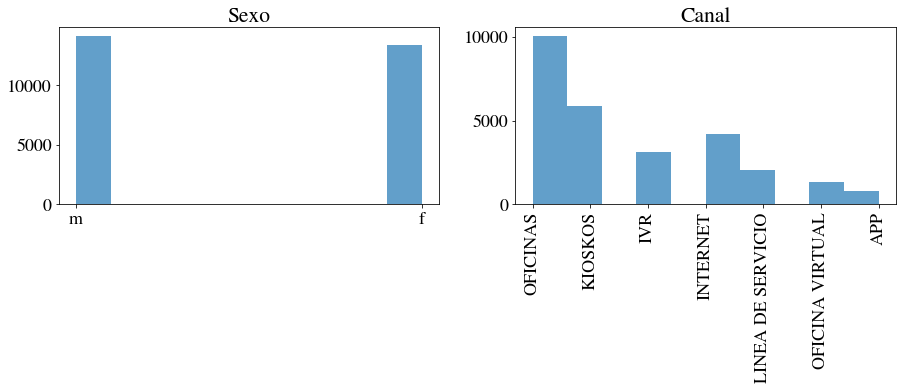

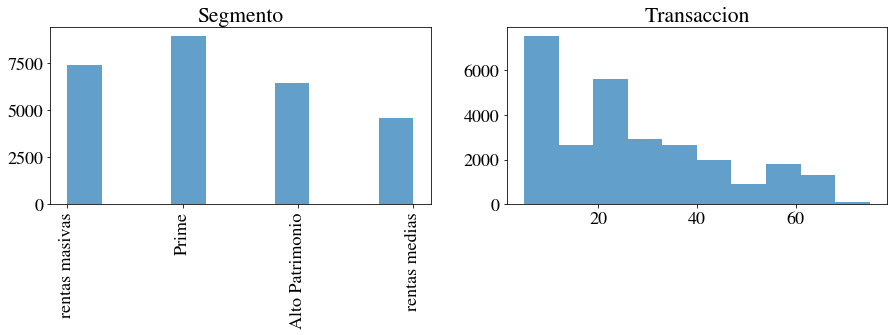

In [27]:
#BD sin eliminar datos atipicos

import matplotlib
from matplotlib import pyplot

matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
pyplot.hist(datos['sexo'], alpha=0.7) 
pyplot.title('Sexo')

ax = fig.add_subplot(4, 2, 2)
pyplot.hist(datos["CANAL"], alpha=0.7) 
pyplot.title('Canal')
pyplot.xticks(rotation=90)

pyplot.show()

fig = pyplot.figure(figsize=(15,15))
ax = fig.add_subplot(4, 2, 1)
pyplot.hist(datos["segmento"], alpha=0.7) 
pyplot.title('Segmento')
pyplot.xticks(rotation=90)

ax = fig.add_subplot(4, 2, 2)
pyplot.hist(datos["COD_SERVICIO"], alpha=0.7) 
pyplot.title('Transaccion')


pyplot.show()
